# expore and cleanup
and also add some features

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
file_path = '../Data/DM2425_ABCDEats_DATASET.csv'
df = pd.read_csv(file_path)
shape_of_df = df.shape
shape_of_df

(31888, 56)

In [4]:
df.head()

,customer_id,customer_region,customer_age,vendor_count,product_count,is_chain,first_order,last_order,last_promo,payment_method,...,HR_14,HR_15,HR_16,HR_17,HR_18,HR_19,HR_20,HR_21,HR_22,HR_23
0,1b8f824d5e,2360,18.0,2,5,1,0.0,1,DELIVERY,DIGI,...,0,0,0,0,2,0,0,0,0,0
1,5d272b9dcb,8670,17.0,2,2,2,0.0,1,DISCOUNT,DIGI,...,0,0,0,0,0,0,0,0,0,0
2,f6d1b2ba63,4660,38.0,1,2,2,0.0,1,DISCOUNT,CASH,...,0,0,0,0,0,0,0,0,0,0
3,180c632ed8,4660,NaN,2,3,1,0.0,2,DELIVERY,DIGI,...,1,0,0,0,0,0,0,0,0,0
4,4eb37a6705,4660,20.0,2,5,0,0.0,2,-,DIGI,...,0,0,0,0,0,0,0,0,0,0


## Remove Duplicates

by the shape of the dataset the primary key should be customer_id, as such every value in this column should be unique

In [5]:
primary_key = 'customer_id'
unique_values = df[primary_key].unique().shape
n_rows = df[primary_key].shape [0]
if unique_values != n_rows:
    print('oh no! there are repetitions!')
else:
    print("all good! no repetitions!")

oh no! there are repetitions!


In [6]:
#find repeated customer_id
repetitions = df[primary_key].value_counts()
#keep only the customer_id that are repeated
repetitions = repetitions[repetitions > 1]
repetitions = repetitions.index
repetitions

Index(['742ca068fc', 'b55012ee1c', 'df91183978', '6bbf5f74cd', '24251eb7da',
       '201a13a34d', 'b8e7a643a4', 'cc08ef25ce', '8aa9bbc147', '671bf0c738',
       '06018a56be', 'fac7984c0d', 'cf563a0a98'],
      dtype='object', name='customer_id')

In [7]:
for customer_id in repetitions:
    rep_df = df[df[primary_key] == customer_id]
    s = rep_df.shape
    s1 = 0
    for i in range(s[1]):
        s1 += rep_df.iloc[:,i].unique().shape[0]
    print(s1 - s[1])
    # remove ont of the repeated  primary keys
    if s1 - s[1] == 0:
        df = df.drop(rep_df.index[0])
        print('dropped repeated customer {p}'.format( p = customer_id))   

0
dropped repeated customer 742ca068fc
0
dropped repeated customer b55012ee1c
0
dropped repeated customer df91183978
0
dropped repeated customer 6bbf5f74cd
0
dropped repeated customer 24251eb7da
0
dropped repeated customer 201a13a34d
0
dropped repeated customer b8e7a643a4
0
dropped repeated customer cc08ef25ce
0
dropped repeated customer 8aa9bbc147
0
dropped repeated customer 671bf0c738
0
dropped repeated customer 06018a56be
0
dropped repeated customer fac7984c0d
0
dropped repeated customer cf563a0a98


In [8]:
df['first_order'].min()

0.0

In [9]:
print("rows: \t{p1} \nclients:{p2}".format( p1 = df.shape [0],
                                        p2 = df[primary_key].unique().shape[0]))


rows: 	31875 
clients:31875


## Check consistency in number of orders
The number of orders distributed by days of the week and hours of the day and should add up to the same number

In [10]:
DOW_col = [col for col in df.columns if col.startswith('DOW')]
HR_col = [col for col in df.columns if col.startswith('HR')]
DOW_col_sum = df[DOW_col].sum(axis=1)
HR_col_sum = df[HR_col].sum(axis=1)
Delta_DOW_HR = DOW_col_sum-HR_col_sum
Delta_DOW_HR.value_counts()

0.0     30711
1.0       934
2.0       159
3.0        39
4.0        15
5.0         8
9.0         2
6.0         2
12.0        1
8.0         1
7.0         1
11.0        1
15.0        1
Name: count, dtype: int64

The values are always positive! 
If there are also missing values in HR this means that HR is underestimating and we can fill the missing values with the difference

In [11]:
HR_nans = df[HR_col].isna().sum(axis = 1)
x = pd.DataFrame(Delta_DOW_HR, HR_nans)
HR_nans[HR_nans > 1].count()

0

each row does not have more than 1 nan! the inconsistency is due to uno specific missing value!

In [12]:
df[HR_col].isna().sum()


HR_0     1164
HR_1        0
HR_2        0
HR_3        0
HR_4        0
HR_5        0
HR_6        0
HR_7        0
HR_8        0
HR_9        0
HR_10       0
HR_11       0
HR_12       0
HR_13       0
HR_14       0
HR_15       0
HR_16       0
HR_17       0
HR_18       0
HR_19       0
HR_20       0
HR_21       0
HR_22       0
HR_23       0
dtype: int64

How convenient! There is at best one missing value in hours and it's  in only in HR_0

In [13]:
HR_col_from1 = HR_col.copy()
HR_col_from1.remove('HR_0')


In [14]:
HR_col_from1_sum = df[HR_col_from1].sum(axis=1)
df['HR_0'] = DOW_col_sum - HR_col_from1_sum

In [15]:
df['HR_0'].isna().sum()

0

In [16]:
df['Total_Orders'] = DOW_col_sum

In [17]:
df['avg_order_product_number'] = df['product_count'] /df['Total_Orders']

## Non Numerical Columns

In [18]:
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()
non_numerical_columns.remove(primary_key)
print(non_numerical_columns)

['customer_region', 'last_promo', 'payment_method']


In [19]:
for col in non_numerical_columns:
    print(f'{col}: {df[col].unique()}')

customer_region: ['2360' '8670' '4660' '2440' '-' '4140' '2490' '8370' '8550']
last_promo: ['DELIVERY' 'DISCOUNT' '-' 'FREEBIE']
payment_method: ['DIGI' 'CASH' 'CARD']


### check for null variables

In [20]:
df.loc[df['customer_region'] == '-', 'customer_region'] = np.nan

In [21]:
df['customer_region'].unique()  

array(['2360', '8670', '4660', '2440', nan, '4140', '2490', '8370',
       '8550'], dtype=object)

In [22]:
df['last_promo'].unique()

array(['DELIVERY', 'DISCOUNT', '-', 'FREEBIE'], dtype=object)

In [23]:
df.loc[df['last_promo'] == '-', 'last_promo'] = "No_Promo"
df['last_promo'].unique()

array(['DELIVERY', 'DISCOUNT', 'No_Promo', 'FREEBIE'], dtype=object)

### customer_region
Geographic region where the customer is located.

In [24]:
region_count = df['customer_region'].value_counts()
region_percentage = region_count / region_count.sum() * 100
print(region_percentage)
region_nan = df['customer_region'].isnull().sum()
print(region_nan/df.shape[0]*100)

customer_region
8670    31.053352
4660    30.382083
2360    28.088315
2440     4.717972
4140     2.726434
8370     1.574778
2490     1.415710
8550     0.041358
Name: count, dtype: float64
1.3866666666666667


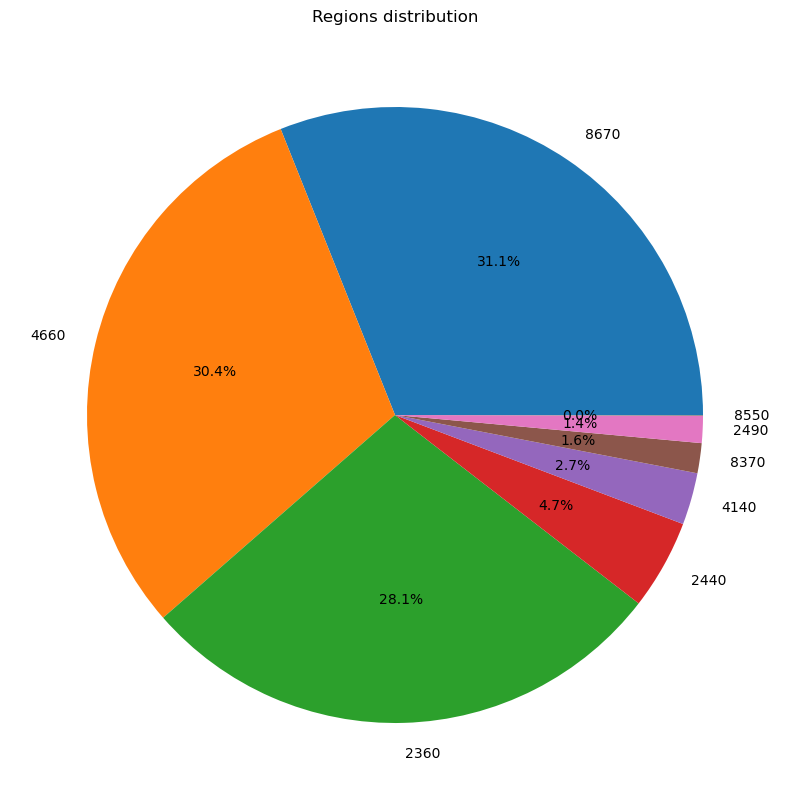

In [25]:
# drow a pie chart for the regions
plt.figure(figsize=(10,10))
plt.pie(region_percentage, labels = region_percentage.index, autopct='%1.1f%%')
plt.title('Regions distribution')
plt.show()


### last_promo
The category of the promotion or discount most recently used by the
custome

In [26]:
# make a new boolean column the is called has_promo 

df['has_promo'] = df['last_promo'] != 'No_Promo'
df['has_promo'].describe()

count     31875
unique        2
top       False
freq      16744
Name: has_promo, dtype: object

has_promo
False    52.530196
True     47.469804
Name: count, dtype: float64


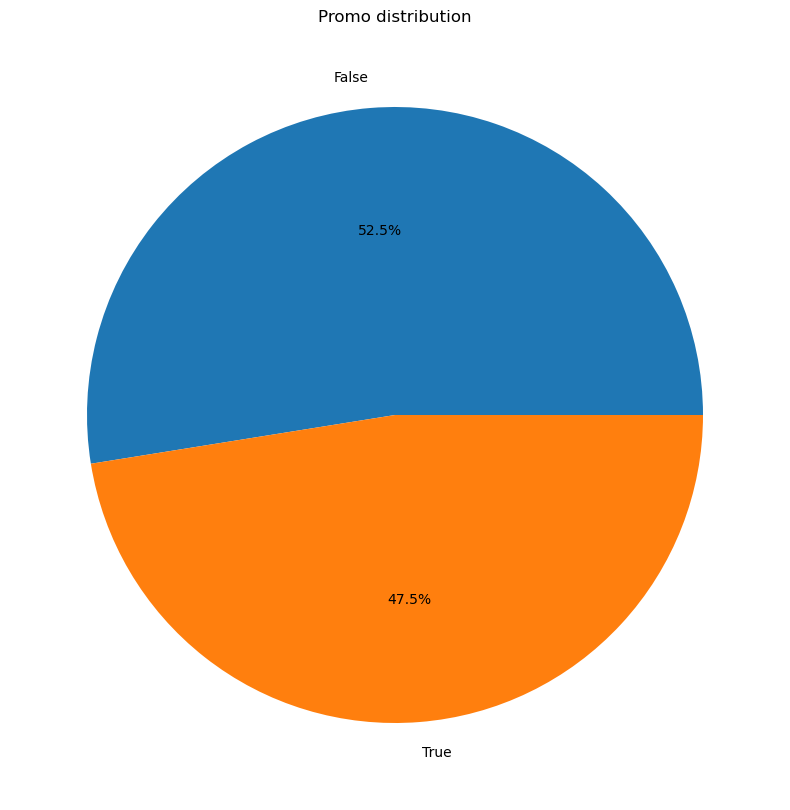

In [27]:
#plot a piechart for has_promo
promo_count = df['has_promo'].value_counts()
promo_percentage = promo_count / promo_count.sum() * 100
print(promo_percentage)
plt.figure(figsize=(10,10))
plt.pie(promo_percentage, labels = promo_percentage.index, autopct='%1.1f%%')
plt.title('Promo distribution')
plt.show() 


last_promo
No_Promo    52.530196
DELIVERY    19.708235
DISCOUNT    14.105098
FREEBIE     13.656471
Name: count, dtype: float64
0.0


Text(0.5, 1.0, 'Promos distribution')

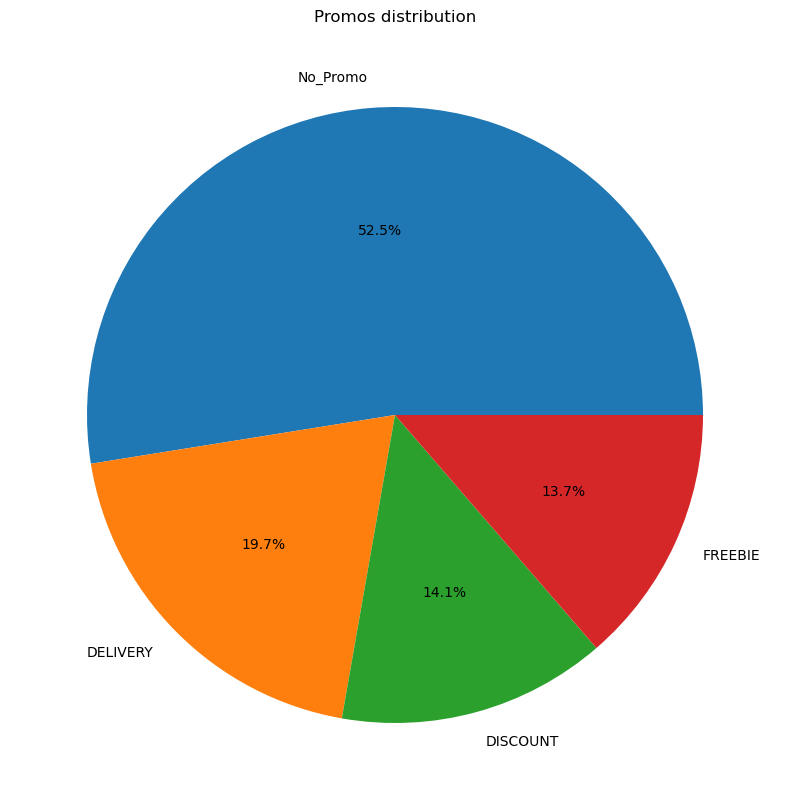

In [28]:
promo_count = df['last_promo'].value_counts()
promo_percentage = promo_count / promo_count.sum() * 100
print(promo_percentage)
promo_count_nan = df['last_promo'].isnull().sum()
print(promo_count_nan/df.shape[0]*100)

# sum aggregate all the promos tigether to get the total number of promos or no promos
plt.figure(figsize=(10,10))
plt.pie(promo_percentage, labels = promo_percentage.index, autopct='%1.1f%%')   
plt.title('Promos distribution')

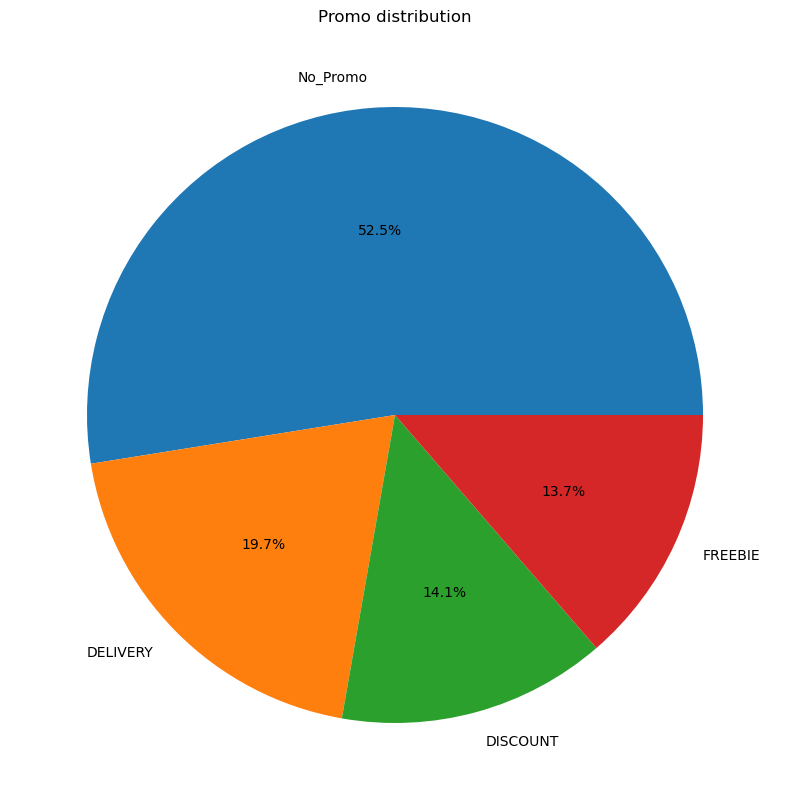

In [29]:
plt.figure(figsize=(10,10))
plt.pie(promo_percentage, labels = promo_percentage.index, autopct='%1.1f%%')
plt.title('Promo distribution')
plt.show()

## Numerical Columns

In [30]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numerical_columns)

['customer_age', 'vendor_count', 'product_count', 'is_chain', 'first_order', 'last_order', 'CUI_American', 'CUI_Asian', 'CUI_Beverages', 'CUI_Cafe', 'CUI_Chicken Dishes', 'CUI_Chinese', 'CUI_Desserts', 'CUI_Healthy', 'CUI_Indian', 'CUI_Italian', 'CUI_Japanese', 'CUI_Noodle Dishes', 'CUI_OTHER', 'CUI_Street Food / Snacks', 'CUI_Thai', 'DOW_0', 'DOW_1', 'DOW_2', 'DOW_3', 'DOW_4', 'DOW_5', 'DOW_6', 'HR_0', 'HR_1', 'HR_2', 'HR_3', 'HR_4', 'HR_5', 'HR_6', 'HR_7', 'HR_8', 'HR_9', 'HR_10', 'HR_11', 'HR_12', 'HR_13', 'HR_14', 'HR_15', 'HR_16', 'HR_17', 'HR_18', 'HR_19', 'HR_20', 'HR_21', 'HR_22', 'HR_23', 'Total_Orders', 'avg_order_product_number']


### product_count
Total number of products the customer has ordered.

In [32]:
df['product_count'].describe()

count    31875.000000
mean         5.668424
std          6.957933
min          0.000000
25%          2.000000
50%          3.000000
75%          7.000000
max        269.000000
Name: product_count, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x177360fb0>,
 'caps': [<matplotlib.lines.Line2D at 0x177361550>,
 'boxes': [<matplotlib.lines.Line2D at 0x177360d10>],
 'medians': [<matplotlib.lines.Line2D at 0x177361a30>],
 'fliers': [<matplotlib.lines.Line2D at 0x177361d60>],
 'means': []}

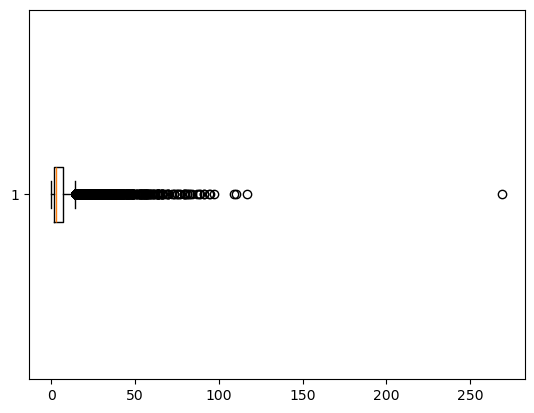

In [35]:
plt.boxplot(df['product_count'], vert = False)

### is_chain

In [22]:
df['is_chain'].describe()

count    31875.000000
mean         2.819357
std          3.977977
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         83.000000
Name: is_chain, dtype: float64

Text(0.5, 1.0, 'is_chain')

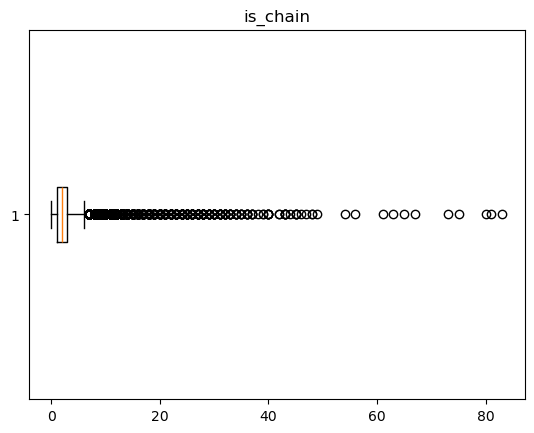

In [36]:
plt.boxplot(df['is_chain'], vert = False)
plt.title('is_chain')

In [24]:
#check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

customer_region     442
customer_age        727
first_order         106
HR_0               1164
dtype: int64

FYI,there are missing values

## Build New Features

In [159]:
new_fetures_list = []
# is there  a naming convention for new features?

### used_promo

In [157]:
df['used_promo']= df['last_promo'] != 'No_Promo'
new_fetures_list.append("used_promo")

### Total Order Per Person

In [160]:
DOW_col_sum = df[DOW_col].sum(axis=1)
new_fetures_list.append("DOW_col_sum")

### How May Products per Order

In [161]:
df['Product_by_Order'] = df['product_count'] /df['Total_Orders']
new_fetures_list.append("Product_by_Order")

### delta_day_order
shows the time passed beween the first order and the last order
-- note:
we could adjust the parameter by using the highest day for the last order in the dataframe as today

In [26]:

df['delta_day_order'] = df['last_order'] - df['first_order'] + 1
new_fetures_list.append('delta_day_order')

### tot_value_cui
shows the total amunt of money spent on the app across all options

In [27]:
cui_columns = [col for col in df.columns if col.startswith('CUI')]
df['tot_value_cui'] = df[cui_columns].sum(axis=1)
new_fetures_list.append('tot_value_cui')

### frequencies and averages
more insightful informations about our customers habits

In [28]:
df['order_freq'] = df['product_count'] / df['delta_day_order']
df['value_freq'] = df['tot_value_cui'] / df['delta_day_order']
df['avg_order_value'] = df['tot_value_cui'] / df['product_count']

new_fetures_list.append('order_freq')
new_fetures_list.append('value_freq')
new_fetures_list.append('avg_order_value')

In [29]:
df['avg_order_value'] = np.where(df['product_count'] != 0, df['tot_value_cui'] / df['product_count'], 0)

### our new features

In [30]:
df[new_fetures_list].describe ()

,delta_day_order,tot_value_cui,order_freq,value_freq,avg_order_value
count,31769.000000,31875.000000,31769.000000,31769.000000,31875.000000
mean,36.414901,38.295857,0.470972,4.322951,7.536316
std,29.415668,46.410657,0.648714,7.995165,4.076761
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,12.880000,0.093333,0.530833,4.092111
50%,35.000000,24.140000,0.171053,1.124000,6.905000
75%,63.000000,44.970000,0.666667,3.723810,10.125833
max,91.000000,1418.330000,14.000000,141.120000,24.390000


In [31]:
#check for missing values
missing_values = df[new_fetures_list].isnull().sum()
missing_values[missing_values > 0]

delta_day_order    106
order_freq         106
value_freq         106
dtype: int64

### Check if I made a mess

In [32]:
nan_inf_counts_list = []

for new_feture in new_fetures_list:
    nan_count = df[new_feture].isna().sum()
    inf_count = df[new_feture].isin([np.inf, -np.inf]).sum()
    nan_inf_counts = {
        'feature:': new_feture,
        'nan_count': nan_count,
        'inf_count': inf_count
    }
    
    nan_inf_counts_list.append((new_feture, nan_count, inf_count))
    
df_naninf = pd.DataFrame( nan_inf_counts_list)
df_naninf

,0,1,2
0,delta_day_order,106,0
1,tot_value_cui,0,0
2,order_freq,106,0
3,value_freq,106,0
4,avg_order_value,0,0


In [33]:
df[new_fetures_list].describe()

,delta_day_order,tot_value_cui,order_freq,value_freq,avg_order_value
count,31769.000000,31875.000000,31769.000000,31769.000000,31875.000000
mean,36.414901,38.295857,0.470972,4.322951,7.536316
std,29.415668,46.410657,0.648714,7.995165,4.076761
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,12.880000,0.093333,0.530833,4.092111
50%,35.000000,24.140000,0.171053,1.124000,6.905000
75%,63.000000,44.970000,0.666667,3.723810,10.125833
max,91.000000,1418.330000,14.000000,141.120000,24.390000
